# Vergleichsspannung

 $$\mathbf{u}(x_1,x_2,x_3)= \begin{pmatrix}u_1(x_1,x_2,x_3)\\u_2(x_1,x_2,x_3)\\u_3(x_1,x_2,x_3) \end{pmatrix}$$
 
 $$\mathbf{E} = \frac{1}{2}\left(\nabla \mathbf{u}+(\nabla \mathbf{u})^T\right)$$
 
 $$\mathbf{\Sigma}  =2\mu \mathbf{E}+\lambda \text{tr}(\mathbf{E})\mathbf{I} $$

S. 182 in [Issler et. al, 2003].

$$\mathbf{\Sigma}  =\begin{pmatrix}\sigma_{11}&&\sigma_{12}&&\sigma_{13}\\
                                   \sigma_{21}&&\sigma_{22}&&\sigma_{23}\\
                                   \sigma_{31}&&\sigma_{31}&&\sigma_{33} 
                                 \end{pmatrix} $$

Wie bekommxt man an einer Stelle $\mathbf{x}\in\mathbb{R}^3$ einen Spannungswert, den man farbcodieren und mit anderen Spannungswerten (z.B. Streckgrenze) vergleichen kann? Z.B. durch die von Mises Vergleichsspannung:

$$\sigma_{v}=\frac{1}{\sqrt{2}}\sqrt{(\sigma_{11}-\sigma_{22})^2+(\sigma_{22}-\sigma_{33})^2+(\sigma_{33}-\sigma_{11})^2+6\cdot(\sigma_{12}^2+\sigma_{23}^2+\sigma_{31}^2)}$$

Sind die Hauptspannungen $\sigma_{I},\sigma_{II},\sigma_{III}$ bekannt, dann ist die von Mises Vergleichsspannung:

$$\sigma_{v}=\frac{1}{\sqrt{2}}\sqrt{(\sigma_{I}-\sigma_{II})^2+(\sigma_{II}-\sigma_{III})^2+(\sigma_{III}-\sigma_{I})^2}$$.

Die die Hauptspannungen $\sigma_{I},\sigma_{II},\sigma_{III}$ sind die Eigenwerte der Spannungsmatrix.

Im Folgenden ein Beispiel. Auf der Seite [sympy live](https://live.sympy.org/) können Sie die Eigenwerte von Matrizen symbolsich berechnen.

In [34]:
from sympy import *
import numpy as np
from numpy import sqrt
from matplotlib import pylab as plt

In [2]:
Sigma=Matrix(([20,0,0],[0,30,40],[0,40,-30]))
Sigma

Matrix([
[20,  0,   0],
[ 0, 30,  40],
[ 0, 40, -30]])

In [3]:
Sigma.eigenvals()

{20: 1, -50: 1, 50: 1}

In [4]:
sigmaI=20
sigmaII=-50 
sigmaIII=50 

In [5]:
summe=(sigmaI-sigmaII)**2+(sigmaII-sigmaIII)**2+(sigmaIII-sigmaI)**2
sigma_v=(1/np.sqrt(2.))*np.sqrt(summe)

In [6]:
sigma_v

88.88194417315589

In [7]:
Spannung=Matrix(([-30,0,-60  ],[0,30,-60],[-60,-60,0]))

In [8]:
Spannung

Matrix([
[-30,   0, -60],
[  0,  30, -60],
[-60, -60,   0]])

In [9]:
Spannung.eigenvals()

{-90: 1, 90: 1, 0: 1}

In [10]:
sigmaI=-90
sigmaII=0
sigmaIII=90

In [11]:
summe=(sigmaI-sigmaII)**2+(sigmaII-sigmaIII)**2+(sigmaIII-sigmaI)**2
sigma_v=(1/np.sqrt(2.))*np.sqrt(summe)
sigma_v

155.88457268119893

In [12]:
Spannung2=Matrix(([20,40,-20  ],[40,20,-20],[-20,-20,-10]))
Spannung2

Matrix([
[ 20,  40, -20],
[ 40,  20, -20],
[-20, -20, -10]])

In [13]:
Spannung2.eigenvals()

{70: 1, -20: 2}

In [14]:
sigmaI=70
sigmaII=-20
sigmaIII=-20

summe=(sigmaI-sigmaII)**2+(sigmaII-sigmaIII)**2+(sigmaIII-sigmaI)**2
sigma_v=(1/np.sqrt(2.))*np.sqrt(summe)
sigma_v

90.0

In [15]:
Spannung3=Matrix(([2,5,3  ],[5,1,4],[3,4,3]))

Spannung3

Matrix([
[2, 5, 3],
[5, 1, 4],
[3, 4, 3]])

In [16]:
Spannung3.eigenvals()

{10: 1, -2 - sqrt(3): 1, -2 + sqrt(3): 1}

In [19]:
Spannung3.charpoly()

PurePoly(lambda**3 - 6*lambda**2 - 39*lambda - 10, lambda, domain='ZZ')

In [17]:
sigmaI=10
sigmaII=-2 - np.sqrt(3)
sigmaIII= -2 + np.sqrt(3)

summe=(sigmaI-sigmaII)**2+(sigmaII-sigmaIII)**2+(sigmaIII-sigmaI)**2
sigma_v=(1/np.sqrt(2.))*np.sqrt(summe)
sigma_v

12.369316876852979

In [30]:
lamda = symbols('lamda')

In [32]:
Spannung3.charpoly(lamda).as_expr()

lamda**3 - 6*lamda**2 - 39*lamda - 10

In [37]:
poly = lambdify(lamda, Spannung3.charpoly(lamda).as_expr())

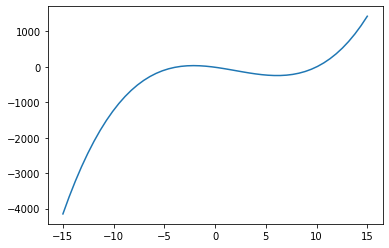

In [38]:
plt.plot(np.linspace(-15, 15), poly(np.linspace(-15, 15)))

In [41]:
poly(10)

0

In [42]:
factor(Spannung3.charpoly(lamda).as_expr())

(lamda - 10)*(lamda**2 + 4*lamda + 1)